In [65]:
#Import necessary things

# Python 2 & 3 Compatibility
from __future__ import division

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.dates as dte
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
import datetime

%matplotlib inline

In [48]:
#Import the movies data!
#Need to parse the dates here to make Exercise 2.1 work in the only way I could get it to go.
chall2movies = pd.read_csv('../challenges/02-pandas/2013_movies.csv', parse_dates=['ReleaseDate'])

In [49]:
chall2movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB


In [76]:
chall2movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


**Exercise 2.1**

Plot domestic total gross over time.

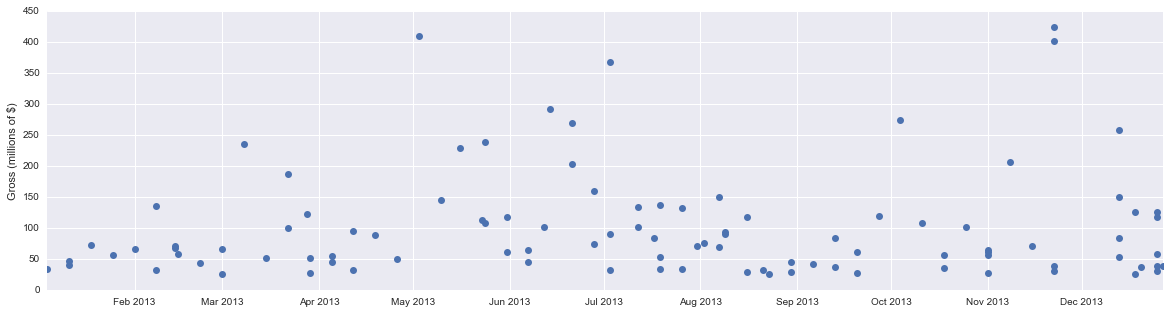

In [87]:
#I want to divide DomesticTotalGross by 1000 so I can show the results in millions
chall2movies['DomesticTotalGross'] = chall2movies['DomesticTotalGross']/1000

plt.figure(figsize=(20,5))
plt.plot(chall2movies['ReleaseDate'],chall2movies['DomesticTotalGross'],'o')
plt.ylabel('Gross (millions of $)')
plt.show()

#I had wanted to do a scatterplot, but plt.scatter caused all kinds of problems with the dates.
# I guess this is about the same, but I want to understand the issues.
# I read that an explanation of how to do this a bit differently, but I couldn't get this to work either:
#"You must first convert your timestamps to Python datetime objects (use datetime.strptime). Then use date2num 
#to convert the dates to matplotlib format. Plot the dates and values using plot_date:
#dates = matplotlib.dates.date2num(list_of_datetimes)
#plot_date(dates, values)

**Exercise 2.2**

Plot runtime vs. domestic total gross.

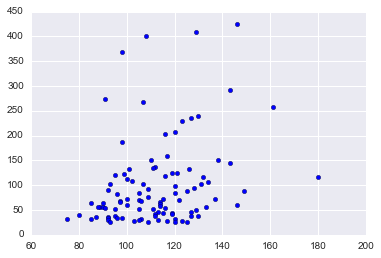

In [88]:
plt.scatter(chall2movies['Runtime'], chall2movies['DomesticTotalGross']);

**Exercise 2.3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [89]:
chall2movies.groupby('Rating').mean()

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,268.492764,107.000000
PG,9.393333e+07,131.135716,99.933333
PG-13,9.660976e+07,111.449769,117.510638
R,3.886364e+07,69.892429,110.729730


**Exercise 2.4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

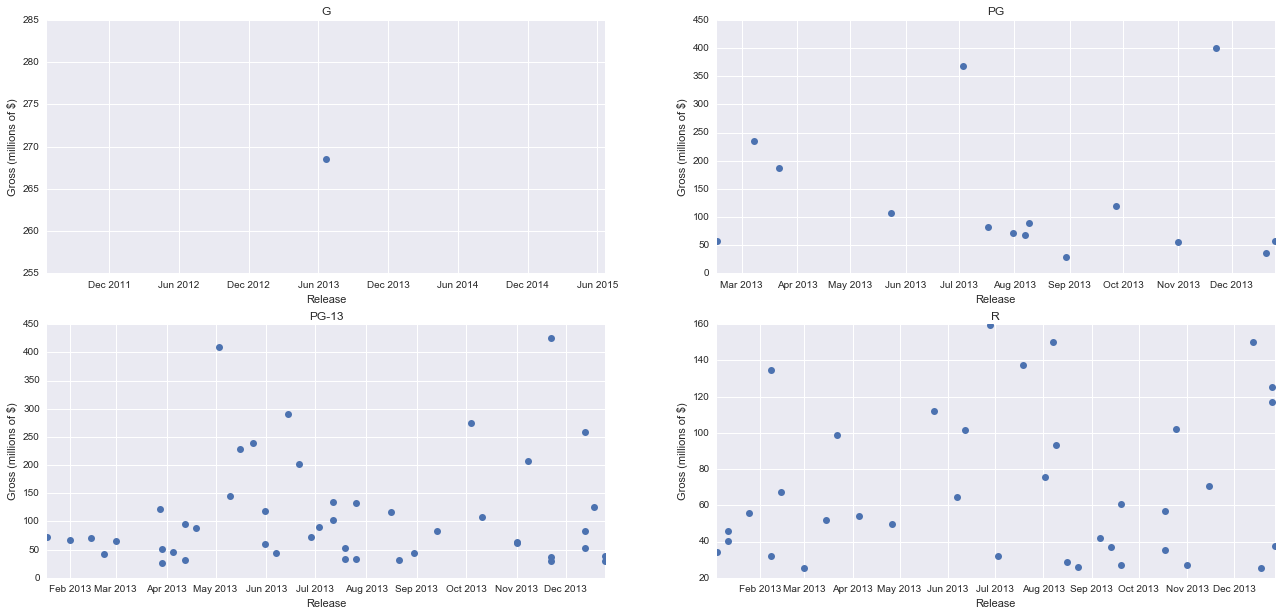

In [90]:
g = chall2movies[chall2movies['Rating'] == "G"].reset_index()
pg = chall2movies[chall2movies['Rating'] == "PG"]
pg13 = chall2movies[chall2movies['Rating'] == "PG-13"]
r = chall2movies[chall2movies['Rating'] == "R"]

plt.figure(figsize=(22, 10))

plt.subplot(2, 2, 1)
plt.plot(g['ReleaseDate'], g['DomesticTotalGross'],'o')
plt.title('G')
plt.xlabel('Release')
plt.ylabel('Gross (millions of $)')

plt.subplot(2, 2, 2)
plt.plot(pg['ReleaseDate'], pg['DomesticTotalGross'],'o')
plt.title('PG')
plt.xlabel('Release')
plt.ylabel('Gross (millions of $)')

plt.subplot(2, 2, 3)
plt.plot(pg13['ReleaseDate'], pg13['DomesticTotalGross'],'o')
plt.title('PG-13')
plt.xlabel('Release')
plt.ylabel('Gross (millions of $)')

plt.subplot(2, 2, 4)
plt.plot(r['ReleaseDate'], r['DomesticTotalGross'],'o')
plt.title('R')
plt.xlabel('Release')
plt.ylabel('Gross (millions of $)')

**Exercise 2.5**

What director in your dataset has the highest gross per movie?

>> It looks like the answer is: *Francis Lawrence*

In [20]:
chall2movies.groupby('Director').mean().sort_values('DomesticTotalGross', ascending = False)

,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000.0,424668047.0,146.0
Shane Black,200000000.0,409013994.0,129.0
Chris BuckJennifer Lee,150000000.0,400738009.0,108.0
Pierre CoffinChris Renaud,76000000.0,368061265.0,98.0
Zack Snyder,225000000.0,291045518.0,143.0
Alfonso Cuaron,100000000.0,274092705.0,91.0
Dan Scanlon,NaN,268492764.0,107.0
Peter Jackson,NaN,258366855.0,161.0
Justin Lin,160000000.0,238679850.0,130.0


**Exercise 2.6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

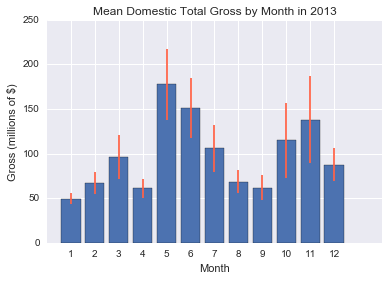

In [148]:
#Create month
chall2movies['Month'] = pd.DatetimeIndex(chall2movies['ReleaseDate']).month

#Create new df with average gross by month
month_df = chall2movies.groupby('Month').mean().reset_index()

#Now calculate size of each of these groups and standard deviation by group, and add each as a column to the new df
std_df = chall2movies.groupby('Month').std().reset_index()
month_df['Stdev'] = std_df['DomesticTotalGross']
observations_df = chall2movies.groupby('Month').count().reset_index()
month_df['Observations'] = observations_df['DomesticTotalGross']

#Calculate stderror and add as a new column
month_df['Stderror'] = month_df['Stdev']/np.sqrt(month_df['Observations'])

#Bar chart of this
plt.bar(month_df['Month'], month_df['DomesticTotalGross'], align = 'center', yerr = month_df['Stderror'], error_kw={'ecolor':'Tomato'})
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.xticks(month_df['Month'])
plt.xlabel('Month')
plt.ylabel('Gross (millions of $)');